# BMW Sales Analysis 

Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Importing Datasets

In [4]:
bmw = pd.read_csv("D:/DA projects/BMW Car Sales Analysis/BMW sales data (2010-2024) (1).csv")

In [5]:
bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [6]:
bmw.tail()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High
49999,X1,2020,North America,Blue,Diesel,Manual,3.3,171003,77492,1764,Low


In [7]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [8]:
bmw.shape

(50000, 11)

In [10]:
bmw.dtypes

Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

In [11]:
bmw.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [12]:
bmw.duplicated().sum()

np.int64(0)

EDA


Yearly Sales Trend

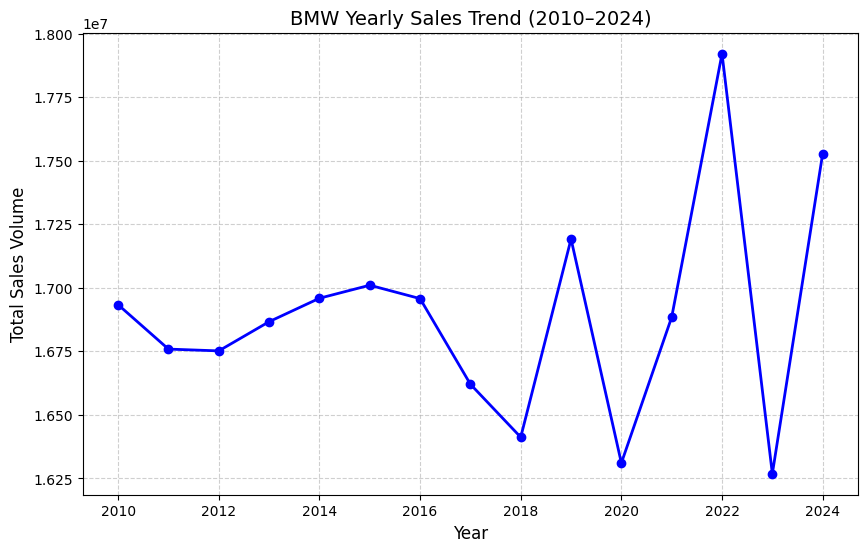

In [14]:
# 1. Group sales by year
yearly_sales = bmw.groupby("Year")["Sales_Volume"].sum().reset_index()

# 2. Plot yearly sales trend
plt.figure(figsize=(10,6))
plt.plot(yearly_sales["Year"], yearly_sales["Sales_Volume"], 
         marker='o', linestyle='-', linewidth=2, color="blue")

# 3. Add title and labels
plt.title("BMW Yearly Sales Trend (2010–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales Volume", fontsize=12)

# 4. Add grid for readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the chart
plt.show()


Regional Insights

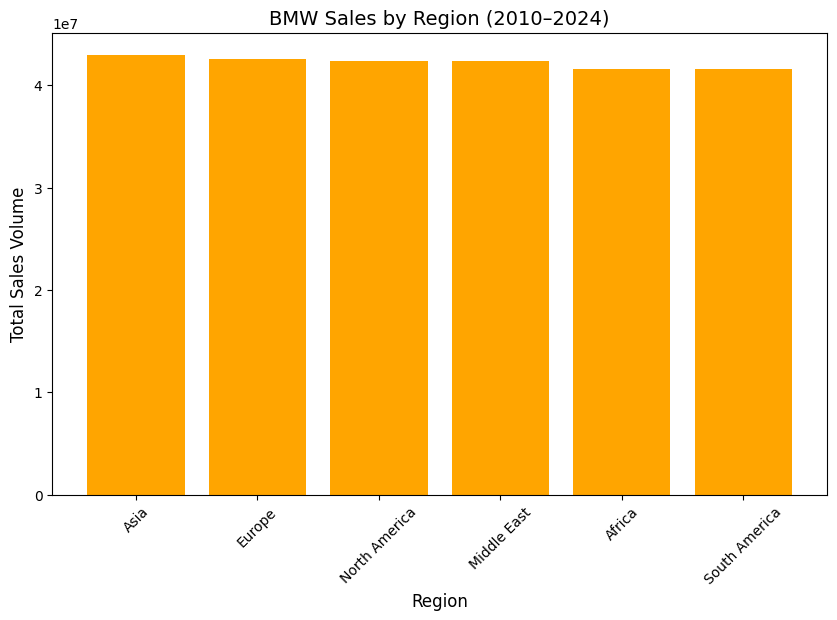

In [15]:
# Group Sales by region
region_sales = bmw.groupby("Region")["Sales_Volume"].sum().reset_index()

# Sort in descending order
region_sales = region_sales.sort_values(by="Sales_Volume", ascending=False)

# Plot bar chart 
plt.figure(figsize=(10,6))
plt.bar(region_sales["Region"], region_sales["Sales_Volume"], color="orange")
plt.title("BMW Sales by Region (2010–2024)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales Volume", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Top Selling Model Insight


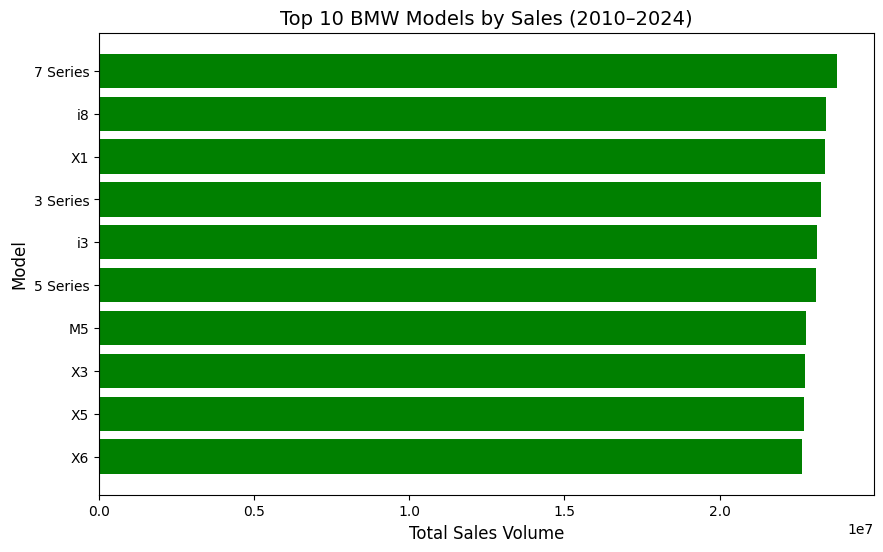

In [16]:
# Group by Model and sum Sales_Volume:

model_sales = bmw.groupby("Model")["Sales_Volume"].sum().reset_index()


# Sort descending:

model_sales = model_sales.sort_values(by="Sales_Volume", ascending=False)


# Take Top 10 models only (to avoid too many bars).

top_models = model_sales.head(10)


# Plot a horizontal bar chart:

plt.figure(figsize=(10,6))
plt.barh(top_models["Model"], top_models["Sales_Volume"], color="green")
plt.title("Top 10 BMW Models by Sales (2010–2024)", fontsize=14)
plt.xlabel("Total Sales Volume", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.gca().invert_yaxis()  # So the highest is on top
plt.show()

Fuel Type Preferences

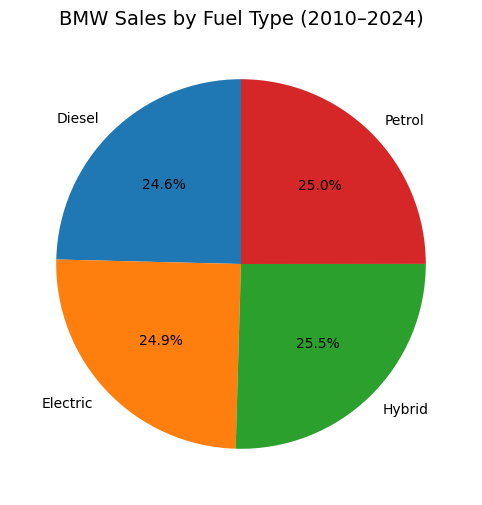

In [17]:
# Group by Fuel_Type and sum sales.

fuel_sales = bmw.groupby("Fuel_Type")["Sales_Volume"].sum().reset_index()


# Plot a pie chart to see proportions:

plt.figure(figsize=(8,6))
plt.pie(fuel_sales["Sales_Volume"], labels=fuel_sales["Fuel_Type"], autopct='%1.1f%%', startangle=90)
plt.title("BMW Sales by Fuel Type (2010–2024)", fontsize=14)
plt.show()


Transmission Preferences

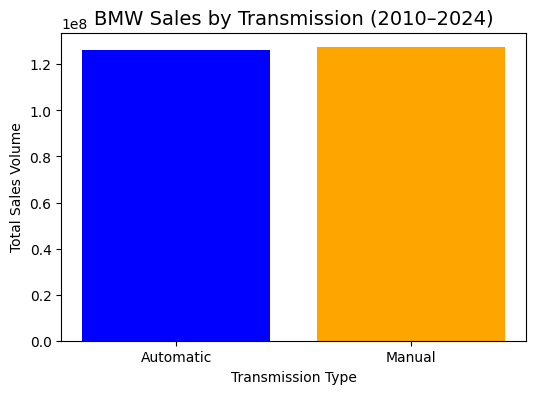

In [18]:
# Group sales by Transmission:

trans_sales = bmw.groupby("Transmission")["Sales_Volume"].sum().reset_index()


# Plot a bar chart:

plt.figure(figsize=(6,4))
plt.bar(trans_sales["Transmission"], trans_sales["Sales_Volume"], color=["blue", "orange"])
plt.title("BMW Sales by Transmission (2010–2024)", fontsize=14)
plt.xlabel("Transmission Type")
plt.ylabel("Total Sales Volume")
plt.show()

Price vs Sales Relationship

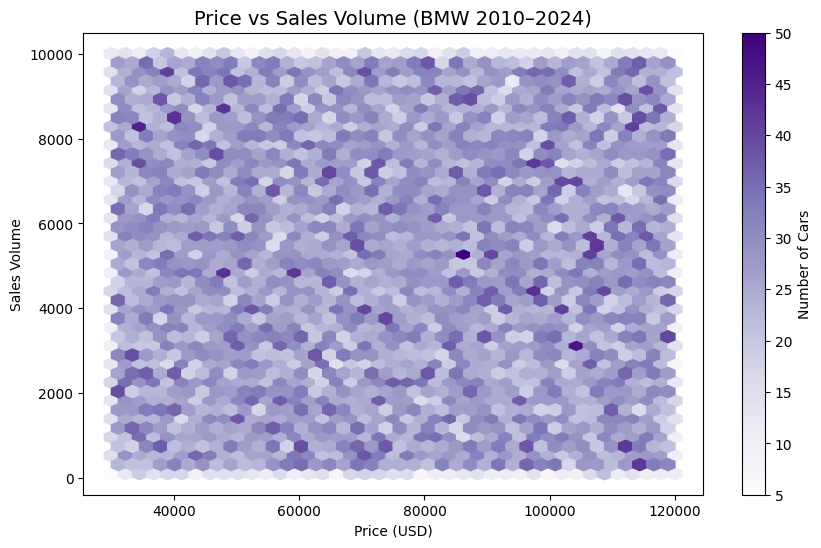

In [23]:
# Create a scatter plot of Price_USD vs Sales_Volume.

plt.figure(figsize=(10,6))
plt.hexbin(bmw["Price_USD"], bmw["Sales_Volume"], gridsize=40, cmap="Purples")
plt.colorbar(label="Number of Cars")
plt.title("Price vs Sales Volume (BMW 2010–2024)", fontsize=14)
plt.xlabel("Price (USD)")
plt.ylabel("Sales Volume")
plt.show()



Engine Size vs Sales Volume


   Engine_Size_L  Sales_Volume
0            1.5       3586006
1            1.6       7280693
2            1.7       7116534
3            1.8       7187053
4            1.9       7667354


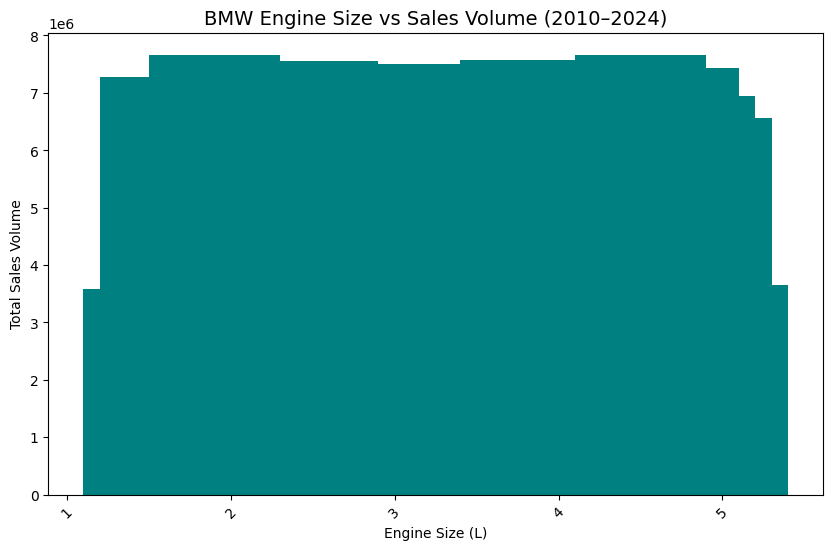

In [26]:
# Aggregate Sales by Engine Size
engine_sales = bmw.groupby("Engine_Size_L")["Sales_Volume"].sum().reset_index()
print(engine_sales.head())

# Plot Bar Chart


plt.figure(figsize=(10,6))
plt.bar(engine_sales["Engine_Size_L"], engine_sales["Sales_Volume"], color="teal")
plt.title("BMW Engine Size vs Sales Volume (2010–2024)", fontsize=14)
plt.xlabel("Engine Size (L)")
plt.ylabel("Total Sales Volume")
plt.xticks(rotation=45)
plt.show()
